In [63]:
#chargement du dataset
import pandas as pd

dataset = pd.read_excel('Clustering BMM.xlsx')

colonnes_violettes = ['Cond TH', 'Masse V', 'Chaleur M', 'K (Pa.s)','n','Alpha','T alpha (K)']
dataset


,FAMILLE,FILIERE,POSTE,FILIERE PMU,Cond TH,Masse V,Chaleur M,K (Pa.s),n,Alpha,T alpha (K)
0,1700,PL,GI,Mixes_GI,0.220,1119,1599,232830.000000,0.184805,1218.810000,330
1,12219,PL,KM,Mixes_KMSC_PL,0.253,1096,1472,190213.000000,0.170976,775.992000,330
2,15365,PL,PS,Mixes_Internal,0.231,1062,1520,197370.235368,0.162797,1153.704386,330
3,16269,PL,BT,Mixes_Internal,0.240,1091,1500,231399.514903,0.172000,1061.235435,330
4,16712,PL,KM,Mixes_KMSC_PL,0.258,1097,1477,320671.282949,0.187219,2043.111236,330
...,...,...,...,...,...,...,...,...,...,...,...
64,26043,TO,KM,Mixes_KMSC_TC,0.254,1201,1511,200224.000000,0.148500,517.278000,330
65,39762,TO,KM,Mixes_KMSC_TC,0.254,1162,1551,334000.000000,0.196000,1457.000000,330
66,89244,PL,KM,Mixes_KMSC_PL,0.228,1150,1540,306594.000000,0.179913,1038.590000,330
67,93335,PL,KM,Mixes_KMSC_PL,0.232,1186,1548,273713.213317,0.128641,1237.014630,330


# Unsupervised learning

## k-means clustering with scikit-learn

In [64]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(dataset[colonnes_violettes])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
dataset['labels'] = model.predict(dataset[colonnes_violettes])


## Scatter plots

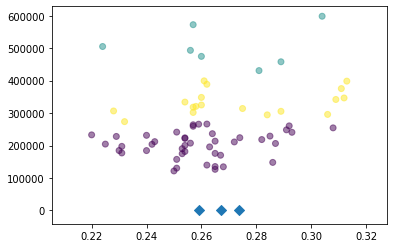

In [66]:
import matplotlib.pyplot as plt
xs = dataset[colonnes_violettes[0]]
ys = dataset[colonnes_violettes[3]]
plt.scatter(xs, ys, c=dataset['labels'], alpha=0.5)
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()


In [67]:
centroids

array([[2.59113636e-01, 1.14563636e+03, 1.49029545e+03, 2.02926371e+05,
        1.70542978e-01, 7.82581561e+02, 3.30000000e+02],
       [2.67285714e-01, 1.12257143e+03, 1.47671429e+03, 5.04890017e+05,
        1.46876071e-01, 1.88229169e+03, 3.30000000e+02],
       [2.73777778e-01, 1.15277778e+03, 1.49188889e+03, 3.32753385e+05,
        1.72400666e-01, 1.32671495e+03, 3.30000000e+02]])

## Cross tabulation with pandas

In [68]:
ct = pd.crosstab(dataset['FILIERE'], dataset['labels'])
print(ct)

labels    0  1  2
FILIERE          
2R        3  0  0
AG        3  0  3
GC        3  0  1
PL       17  6  8
TO       18  1  6


In [69]:
ct = pd.crosstab(dataset['POSTE'], dataset['labels'])
print(ct)

labels   0  1   2
POSTE            
BJ       1  0   0
BT       3  0   0
CJK      1  0   0
FE       2  0   0
GI       1  0   0
GSK      1  0   0
KM      18  6  17
NC       1  0   0
NS       6  0   0
NSF      1  0   0
PS       2  0   0
PT       1  1   1
RIC      1  0   0
RT/HT    1  0   0
SC/KM1   4  0   0


In [70]:
ct = pd.crosstab(dataset['FILIERE PMU'], dataset['labels'])
print(ct)

labels                      0  1  2
FILIERE PMU                        
Mixes_FE_PT_CJK             5  1  1
Mixes_GI                    1  0  0
Mixes_Internal              7  0  0
Mixes_KMSC_2R_AG_AV_GC      5  0  3
Mixes_KMSC_PL               6  6  8
Mixes_KMSC_TC              12  0  6
Mixes_MetallicCalendering   7  0  0
Mixes_TextileCalendering    1  0  0


## Measuring cluster quality - cluster 4 semble etre une bonne valeur

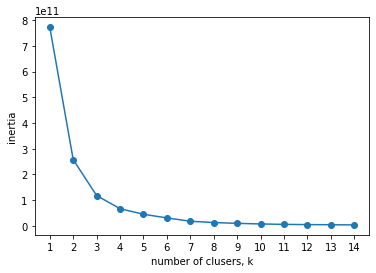

In [71]:
from sklearn.cluster import KMeans

inertia=[]
ks= range(1,15)
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(dataset[colonnes_violettes])
    inertia.append(model.inertia_)

plt.plot(ks, inertia, '-o')
plt.xlabel('number of clusers, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# Transforming features for better clusterings

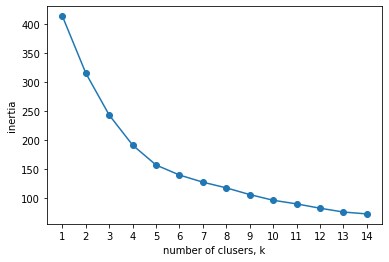

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataset[colonnes_violettes])
dataset_scaled = scaler.transform(dataset[colonnes_violettes])

inertia=[]
ks= range(1,15)
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(dataset_scaled)
    inertia.append(model.inertia_)

plt.plot(ks, inertia, '-o')
plt.xlabel('number of clusers, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [73]:
kmeans = KMeans(n_clusters=6)
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(dataset[colonnes_violettes])
labels = pipeline.predict(dataset[colonnes_violettes])


In [74]:
labels

array([4, 0, 4, 4, 2, 1, 3, 0, 0, 3, 3, 1, 3, 4, 2, 4, 2, 0, 5, 0, 0, 3,
       0, 4, 1, 0, 5, 4, 3, 0, 0, 4, 1, 3, 3, 4, 0, 5, 5, 5, 1, 1, 1, 5,
       2, 0, 1, 1, 1, 1, 3, 2, 3, 5, 4, 2, 1, 1, 1, 2, 3, 1, 1, 3, 1, 1,
       4, 1, 2])

In [75]:
kmeans.inertia_

140.70612505083844

In [76]:
df = pd.DataFrame({'labels': labels, 'filiere': dataset['FILIERE'], 'poste': dataset['POSTE'], 'filiere_pmu': dataset['FILIERE PMU']})
ct_filiere = pd.crosstab(df['labels'], df['filiere'])
print(ct_filiere)
ct_poste = pd.crosstab(df['labels'], df['poste'])
print(ct_poste)
ct_filiere_pmu = pd.crosstab(df['labels'], df['filiere_pmu'])
print(ct_filiere_pmu)
ct_filiere_pmu

filiere  2R  AG  GC  PL  TO
labels                     
0         0   3   1   5   3
1         3   0   2   2  12
2         0   0   0   8   0
3         0   0   0   4   8
4         0   0   0  10   1
5         0   3   1   2   1
poste   BJ  BT  CJK  FE  GI  GSK  KM  NC  NS  NSF  PS  PT  RIC  RT/HT  SC/KM1
labels                                                                       
0        0   0    1   2   0    1   4   0   1    0   1   1    1      0       0
1        0   0    0   0   0    0  17   0   1    0   0   0    0      0       1
2        0   0    0   0   0    0   8   0   0    0   0   0    0      0       0
3        1   0    0   0   0    0   4   1   4    1   0   0    0      1       0
4        0   3    0   0   1    0   3   0   0    0   1   0    0      0       3
5        0   0    0   0   0    0   5   0   0    0   0   2    0      0       0
filiere_pmu  Mixes_FE_PT_CJK  Mixes_GI  Mixes_Internal  \
labels                                                   
0                          5        

filiere_pmu,Mixes_FE_PT_CJK,Mixes_GI,Mixes_Internal,Mixes_KMSC_2R_AG_AV_GC,Mixes_KMSC_PL,Mixes_KMSC_TC,Mixes_MetallicCalendering,Mixes_TextileCalendering
labels,,,,,,,,
0,5,0,1,0,4,1,1,0
1,0,0,0,5,1,12,1,0
2,0,0,0,0,8,0,0,0
3,0,0,2,0,0,4,5,1
4,0,1,4,0,5,1,0,0
5,2,0,0,3,2,0,0,0
